In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('Mall_Customers.csv')
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [9]:
# clean the data
df = df.drop(['CustomerID', 'Age', 'Gender'], axis=1)
print(df.head())

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40


In [68]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)

# find the clusters
obj = kmeans.fit(df)

In [67]:
print(kmeans.labels_)
df_new = df.copy()
df_new['cluster'] = kmeans.labels_
print(df_new.head())

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]
   Annual Income (k$)  Spending Score (1-100)  cluster
0                  15                      39        2
1                  15                      81        3
2                  16                       6        2
3                  16                      77        3
4                  17                      40        2


In [64]:
print(kmeans.cluster_centers_)

[[55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [86.53846154 82.12820513]]


In [65]:
# sum of squared difference between every point and centroid (WSS)
print(kmeans.inertia_)

44448.45544793369


### visualization

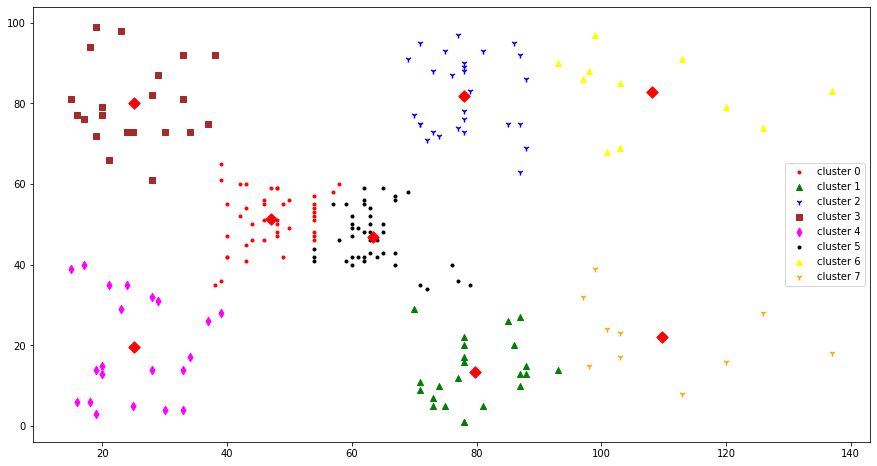

In [57]:
plt.figure(figsize=(15, 8))
colors = ['red', 'green', 'blue', 'brown', 'magenta', 'black', 'yellow', 'orange']
markers = ['.', '^', '1', 's', 'd', '.', '^', '1']

# create clusters
for k in range(8):
    plt.scatter(
        df['Annual Income (k$)'][kmeans.labels_ == k], 
        df['Spending Score (1-100)'][kmeans.labels_ == k], 
        label=f"cluster {k}",
        color=colors[k], 
        marker=markers[k])


# add centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="D", color="red", s=65)
    
plt.legend()

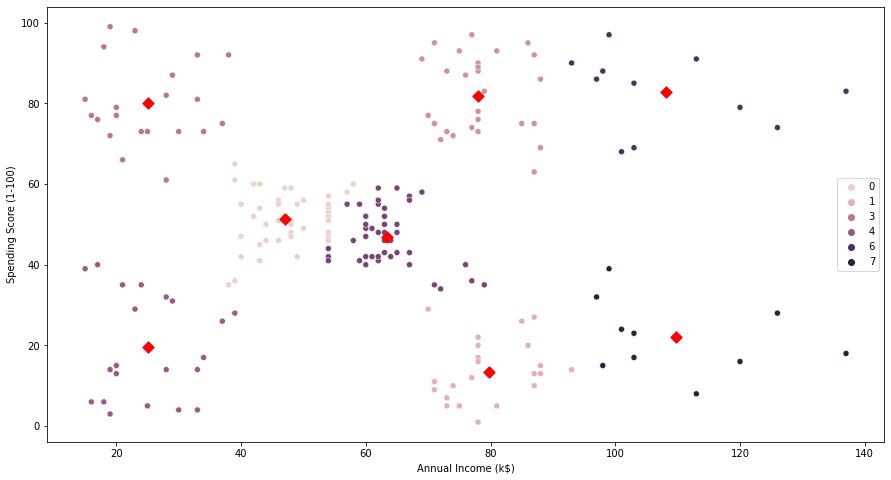

In [50]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", cmap="coolwarm", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="D", color="red", s=65)
    

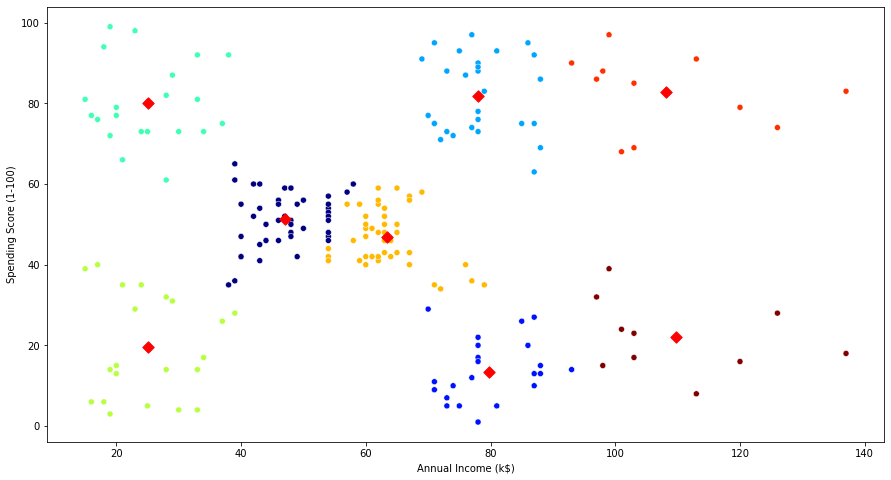

In [51]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data=df, x="Annual Income (k$)", y="Spending Score (1-100)", cmap="jet", c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="D", color="red", s=65)
    